In [1]:
import pandas as pd 
import snntorch as snn 
import torch

In [2]:
data = pd.read_csv("../data/Epileptic Seizure Recognition.csv")
data.drop("Unnamed",axis=1,inplace=True)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
print(data.isnull().sum().sum())
print(len(data))

0
11500


In [10]:
def data_sep(dataframe):
    """ 
        y-row:
        5 - eyes open
        4 - eyes closed
        3 - eeg from the healthy brain area
        2 - eeg from the tumor brain area
        1 - recording during seizure activity
    """
    dataframe[dataframe['y']==5].to_csv("../data/Seizure_based/eyes_open.csv",index=False,encoding="utf-8")

    dataframe[dataframe['y']==4].to_csv("../data/Seizure_based/eyes_closed.csv",index=False,encoding="utf-8")

    dataframe[dataframe['y']==3].to_csv("../data/Seizure_based/healthy_part.csv",index=False,encoding="utf-8")

    dataframe[dataframe['y']==2].to_csv("../data/Seizure_based/tumor_part.csv",index=False,encoding="utf-8")

    dataframe[dataframe['y']==1].to_csv("../data/Seizure_based/seizure_act.csv",index=False,encoding="utf-8")

data_sep(data)

In [4]:
from torch.utils.data import DataLoader
healthy_ = pd.read_csv("../data/Seizure_based/healthy_part.csv")
healthy_loader = DataLoader(healthy_,batch_size=32,shuffle=True)

In [5]:
num_steps = 10
raw_vector = torch.ones(num_steps)*.5 
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

Converted vector: tensor([1., 1., 0., 1., 0., 0., 0., 1., 1., 0.])
The output is spiking 50.00% of the time.


In [6]:
from snntorch import spikegen

healthy_.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,92,49,0,-32,-51,-65,-37,-19,-25,-29,...,-56,-41,-40,-43,-32,-13,-1,-7,-44,3
1,-135,-133,-125,-118,-111,-105,-102,-93,-94,-90,...,-49,-39,-35,-29,-10,4,21,31,37,3
2,9,4,-5,-10,-22,-30,-33,-43,-41,-40,...,34,27,22,18,15,13,9,9,3,3
3,-16,-15,-19,-16,-14,-5,0,-1,-3,-5,...,56,56,62,54,53,53,50,57,54,3
4,90,60,56,50,-6,-30,-48,-48,-19,9,...,-50,-51,-48,1,-1,27,2,-6,12,3


In [7]:
X1 = torch.Tensor(healthy_['X1'].values)
X1_spike = spikegen.rate(X1,num_steps=1)

In [8]:
import matplotlib.pyplot as plt 
import snntorch.spikeplot as splt

In [9]:
print(X1_spike.size())

torch.Size([1, 2300])


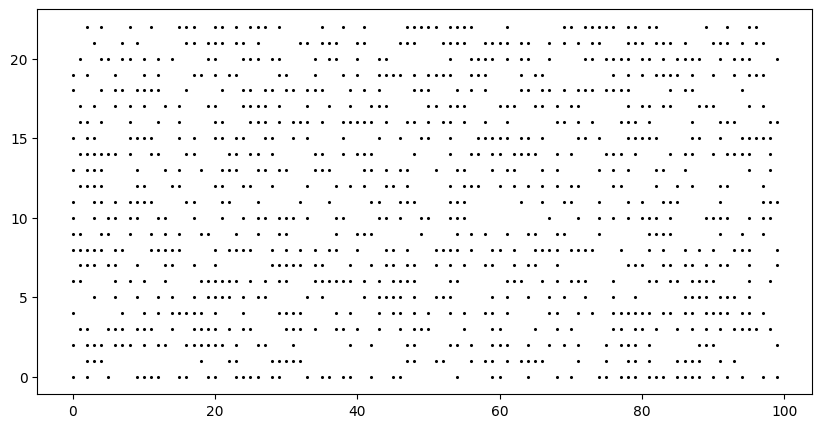

In [10]:
fig = plt.figure(facecolor="w",figsize=(10,5))
ax = fig.add_subplot(111)
splt.raster(X1_spike.reshape((100,-1)),ax,s=1.5,c="black")

([], [])

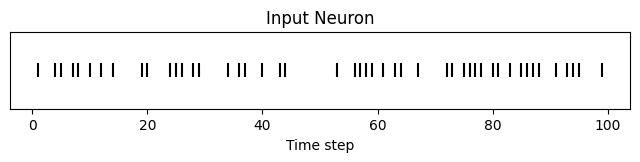

In [11]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(X1_spike.reshape(100, -1)[:, 20].unsqueeze(1), ax, s=100, c="black", marker="|")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])

In [12]:
raw_data = torch.Tensor(healthy_.values)
spike_data = spikegen.delta(raw_data)

Text(0, 0.5, 'Neuron number')

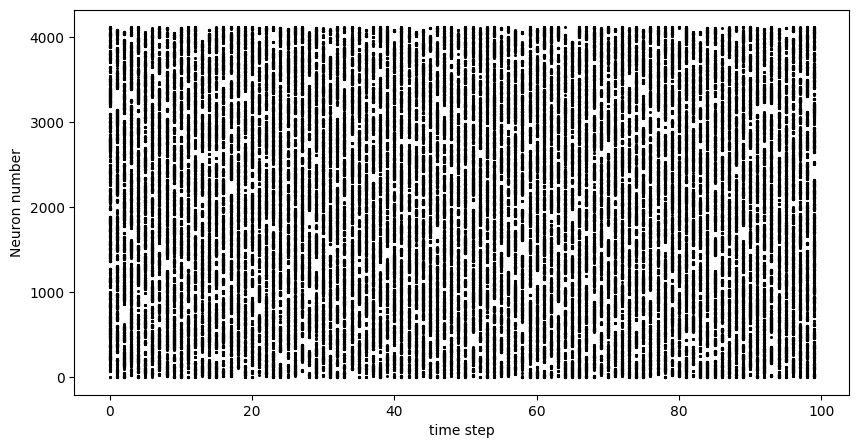

In [13]:
fig = plt.figure(facecolor="w",figsize=(10,5))
ax = fig.add_subplot(111)
splt.raster(spike_data.reshape((100,-1)),ax,s=1.5,c="black")
plt.xlabel("time step")
plt.ylabel("Neuron number")

In [14]:
spike_data_s = spike_data[:,0]
spike_data_s.size()

torch.Size([2300])

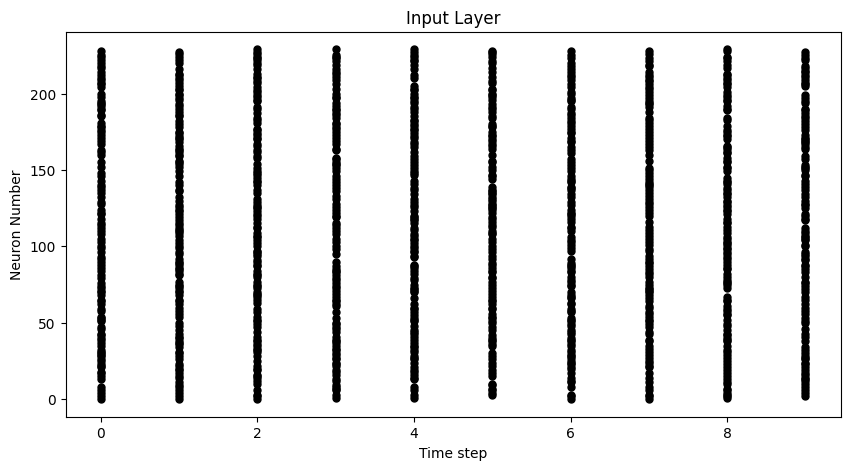

In [15]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data[:, 0].view(num_steps, -1), ax, s=25, c="black")
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

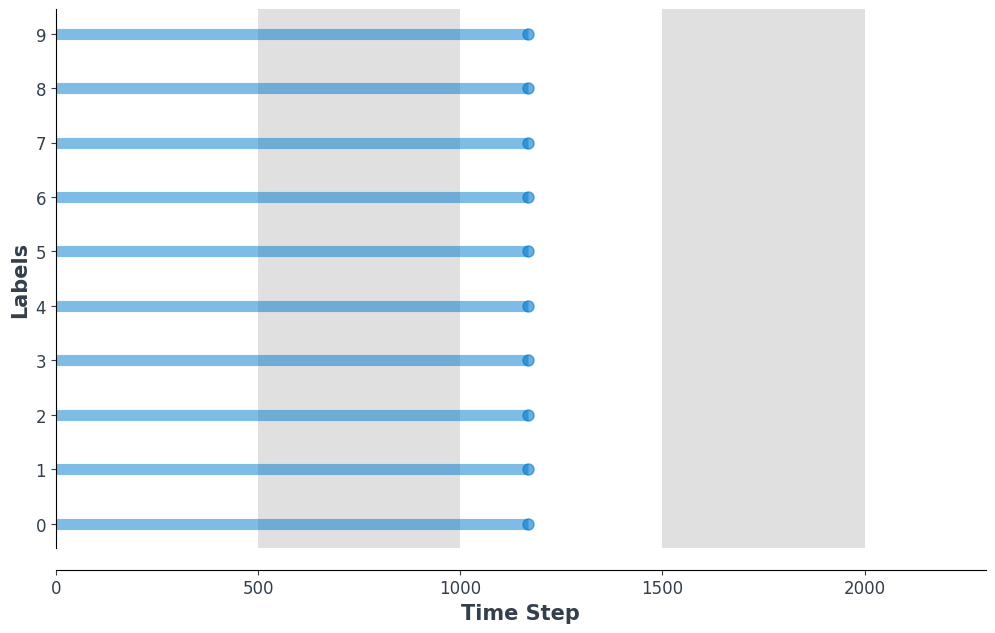

In [16]:
fig,ax = plt.subplots(facecolor="w",figsize=(12,7))
labels = [str(x) for x in range(0,10)]
splt.spike_count(spike_data[:,0],fig,ax,labels=labels)

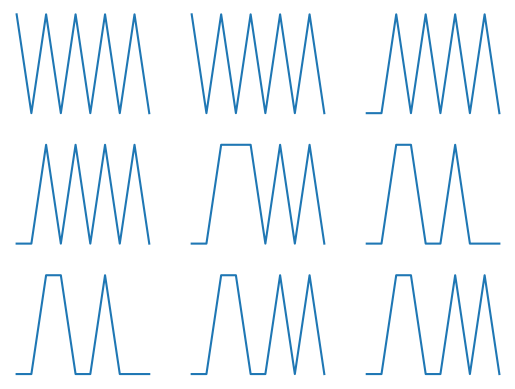

In [17]:
splt.traces(spike_data[0:10],dim=(3,3))